In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import matplotlib.colors as mcolors

In [69]:
path = '../results/HPC_runs/'
files = glob.glob('../results/HPC_runs/*.npy')
runs = list(np.unique([file[file.find('lr'):].rstrip('.npy') for file in files]))
n_runs = len(runs)

In [70]:
losses = {}
train_accuracies = {}
test_accuracies = {}
train_confusion = {}
test_confusion = {}

for run in runs:
    losses[run] = np.mean(np.load(path+'losses_' + run + '.npy'),axis=0)
    train_accuracies[run] = np.mean(np.load(path+'train_accuracies_' + run + '.npy'),axis=0)
    test_accuracies[run] = np.mean(np.load(path+'test_accuracies_' + run + '.npy'),axis=0)
    train_confusion[run] = np.sum(np.load(path+'train_confusion_' + run + '.npy'),axis=0)
    test_confusion[run] = np.sum(np.load(path+'test_confusion_' + run + '.npy'),axis=0)

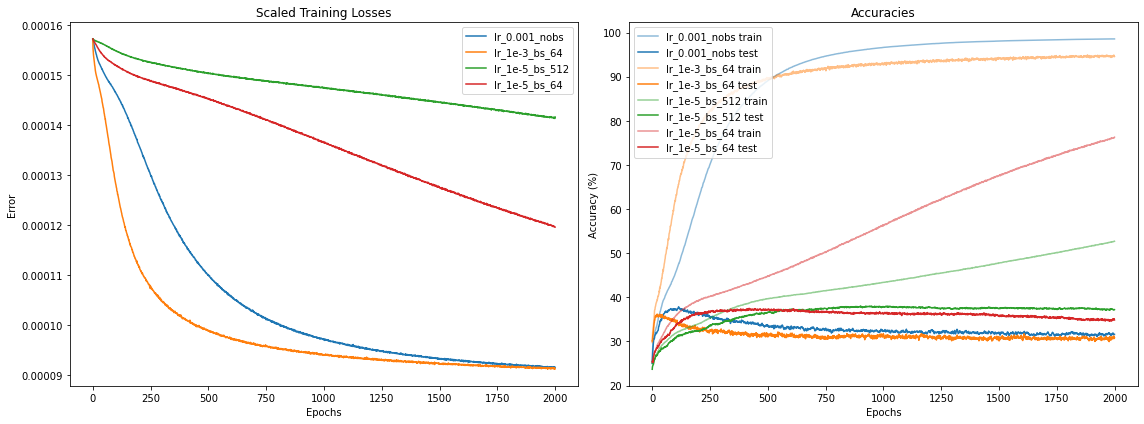

In [73]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
colors = list(mcolors.TABLEAU_COLORS)

scaler = losses[runs[0]][0]

for i,run in enumerate(runs):
    ax[0].plot(losses[run]*scaler/losses[run][0], c=colors[i], label=run)
    ax[1].plot(train_accuracies[run]*100, alpha=0.5, c=colors[i], label=run+ ' train')
    ax[1].plot(test_accuracies[run]*100, alpha=1, c=colors[i], label=run+ ' test')
    
ax[0].set_title('Scaled Training Losses')
ax[1].set_title('Accuracies')

ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel('Error')
ax[1].set_ylabel('Accuracy (%)')

ax[0].legend()
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

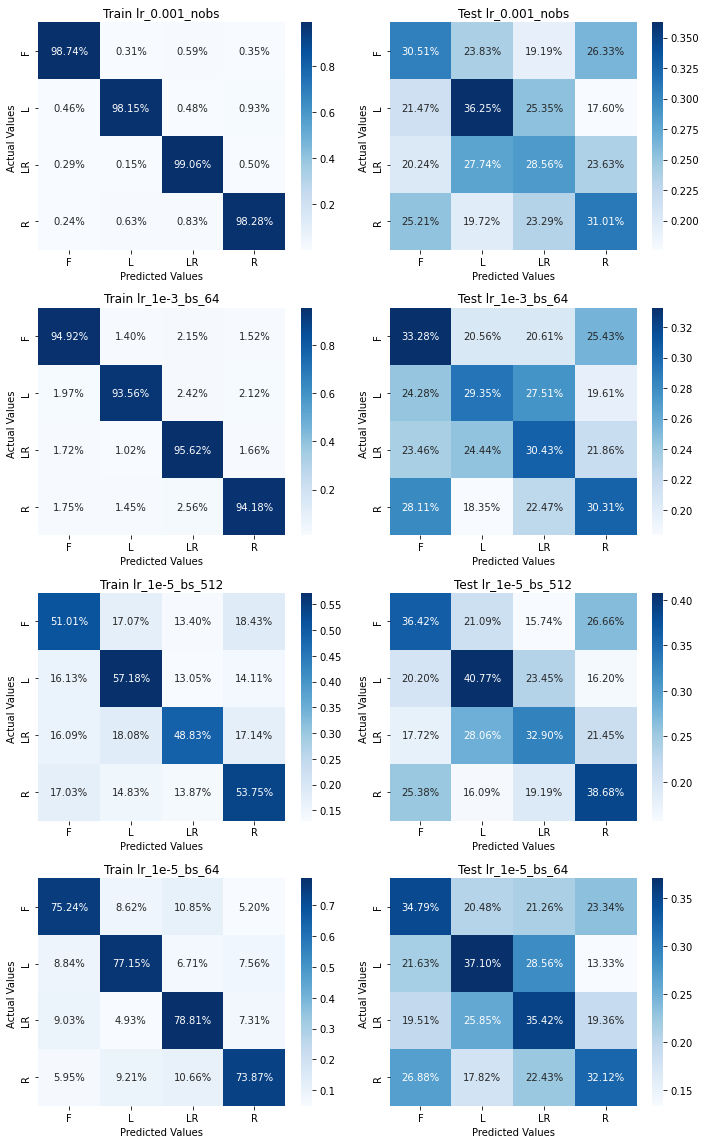

In [76]:
fig, ax = plt.subplots(n_runs,2, figsize=(10,16))

for i,run in enumerate(runs):
    sns.heatmap(train_confusion[run]/np.sum(train_confusion[run], axis=1), 
                     fmt=".2%", annot=True, ax=ax[i,0], cmap='Blues')

    sns.heatmap(test_confusion[run]/np.sum(test_confusion[run], axis=1),
                     fmt=".2%", annot=True, ax=ax[i,1], cmap='Blues')

    ax[i,0].set_xlabel('Predicted Values')
    ax[i,0].set_ylabel('Actual Values ')
    ax[i,1].set_xlabel('Predicted Values')
    ax[i,1].set_ylabel('Actual Values ')
    ax[i,0].set_title('Train ' + run)
    ax[i,1].set_title('Test ' + run)

    ## Ticket labels - List must be in alphabetical order
    ax[i,0].xaxis.set_ticklabels(['F','L','LR','R'])
    ax[i,0].yaxis.set_ticklabels(['F','L','LR','R'])
    ax[i,1].xaxis.set_ticklabels(['F','L','LR','R'])
    ax[i,1].yaxis.set_ticklabels(['F','L','LR','R'])

    ## Display the visualization of the Confusion Matrix.

fig.tight_layout()
plt.show()